In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)

print(x.shape)
print(y1.shape)

(100,)
(100,)


### matplotlib

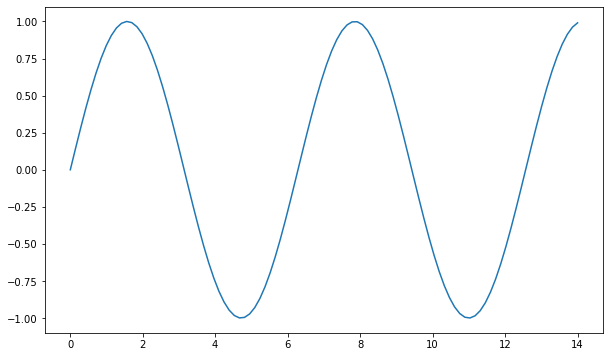

In [15]:
y2 = 2 * np.sin(x + 0.5)
y3 = 4 * np.sin(x + 1.0)

plt.figure(figsize=(10, 6)) # 그림의 크기 설정
plt.plot(x, y1)
plt.show()

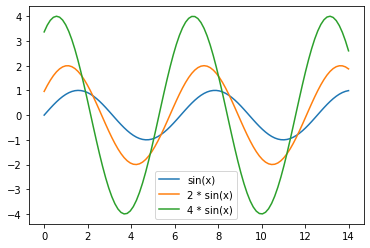

In [19]:
# plt.figure(figsize=(10, 6)) # 그림의 크기 설정코드는 그래프를 그리기 전에 구현되어야 한다.

plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, label="2 * sin(x)")
plt.plot(x, y3, label="4 * sin(x)")

plt.legend()
plt.show()

### tip 데이터 살펴보고 인사이트 얻기

In [20]:
sns.set_style("whitegrid") # 그래프 스타일 설정

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 실습 1-1
* 2개 그래프 그려보기
* 언제 쓰이는가와 확인한 점 체크

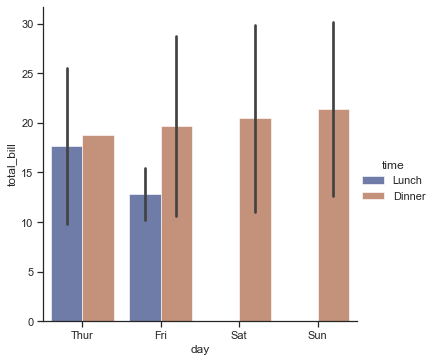

In [31]:
# grouped barplot

sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="time", ci="sd", palette="dark",
                alpha=.6)
plt.show()

#### 그래프에 대한 해석 및 언제 쓰이는지

* grouped barplot은 hue 매개변수를 사용하여, x축의 데이터를 카테고리로 나눠 파악할 때 사용
* 각 막대별로 중간의 검은선은 x축 막대의 속한 데이터의 표준편차를 나타낸다. (목요일 저녁의 경우, 1개의 데이터만 존재함을 말해줌!) 검은선이 긴 경우 -> 데이터의 표준편차 값이 높다라는 것을 의미

* 날짜별 지출 비용을 보았을 때, 평일(목요일, 금요일) 보다는 주말(토요일, 일요일)에 지출된 비용이 높은 케이스가 있음을 볼 수 있다.
* 특히, 주말에는 점심 식사에 대한 데이터가 없는 것을 확인할 수 있다. (주말 점심은 수요가 없는 것인지? 추정)

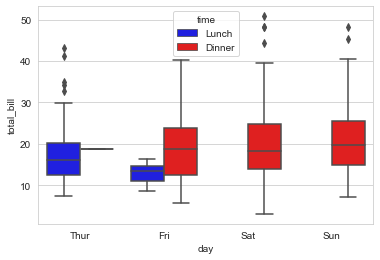

In [28]:
# grouped boxplot

sns.boxplot(x="day", y="total_bill", hue="time", palette=["b", "r"], data=tips)

plt.show()

In [32]:
tips.corr() # 컬럼 데이터 간의 상관관계 파악 테이블

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [42]:
fg = sns.load_dataset("flights")

# 데이터 컬럼 확인 (컬럼이름, 컬럼 자료형)
# 데이터 행과 열의 개수 확인
# 데이터 요약 값
# 데이터 실제 확인

print(fg.shape, '\n')
print(fg.columns, '\n')
print(fg.info(), '\n')
print(fg.dtypes, '\n')
print(fg.describe())

(144, 3) 

Index(['year', 'month', 'passengers'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None 

year             int64
month         category
passengers       int64
dtype: object 

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


#### df.info()가 있는 df.dtypes를 활용해야 하는 이유는 무엇인가?

* df.info()는 df의 전체 정보만을 return 값으로 보여줌
* df.dtypes는 컬럼의 자료형 정보를 리스트 형태로 반환한다. 
* 따라서, 개별 column의 자료형을 가져다 써야 할 경우 dtypes 라는 df클래스의 변수 값을 이용할 수 있다.

In [43]:
print(fg.head(), '\n')
print(fg.tail())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121 

     year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432


In [56]:
# pandas 자료형 객체와 numpy 자료형 객체는 동일한 기능을 구현하는 명령어가 다른것도 있고, 같은 것도 있다.

print(type(fg))
print(fg.sort_values, '\n')
print(fg.shape)

fg_numpy = np.array(fg)
print(type(fg_numpy), '\n')
fg_numpy = fg_numpy
print(fg_numpy)
print(fg_numpy.shape)

<class 'pandas.core.frame.DataFrame'>
<bound method DataFrame.sort_values of      year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]> 

(144, 3)
<class 'numpy.ndarray'> 

[[1949 'Jan' 112]
 [1949 'Feb' 118]
 [1949 'Mar' 132]
 [1949 'Apr' 129]
 [1949 'May' 121]
 [1949 'Jun' 135]
 [1949 'Jul' 148]
 [1949 'Aug' 148]
 [1949 'Sep' 136]
 [1949 'Oct' 119]
 [1949 'Nov' 104]
 [1949 'Dec' 118]
 [1950 'Jan' 115]
 [1950 'Feb' 126]
 [1950 'Mar' 141]
 [1950 'Apr' 135]
 [1950 'May' 125]
 [1950 'Jun' 149]
 [1950 'Jul' 170]
 [1950 'Aug' 170]
 [1950 'Sep' 158]
 [1950 'Oct' 133]
 [1950 'Nov' 114]
 [1950 'Dec' 140]
 [1951 'Jan' 145]
 [1951 'Feb' 150]
 [1951 'Mar' 178]
 [1951 'Apr' 163]
 [1951 'May' 172]
 [1

In [58]:
fg

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [61]:
# pivot 메소드는 df의 내부 columns 데이터를 -> index, columns, values 3가지 매개변수에 지정이 가능하다
# 자신이 원하는 형태의 df로 structure를 변경시킬 수 있다.
# 3가지 매개변수에는 리스트 형태의 argument를 적용시키는 것도 가능하다.

fg.pivot(columns=["year", "month"], values="passengers")
fg.pivot(index="month", columns="year", values="passengers")

year    1949                                                  ... 1960      \
month    Jan    Feb    Mar    Apr    May Jun Jul Aug Sep Oct  ...  Mar Apr   
0      112.0    NaN    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
1        NaN  118.0    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
2        NaN    NaN  132.0    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
3        NaN    NaN    NaN  129.0    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
4        NaN    NaN    NaN    NaN  121.0 NaN NaN NaN NaN NaN  ...  NaN NaN   
..       ...    ...    ...    ...    ...  ..  ..  ..  ..  ..  ...  ...  ..   
139      NaN    NaN    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
140      NaN    NaN    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
141      NaN    NaN    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
142      NaN    NaN    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
143      NaN    NaN    NaN    NaN    NaN NaN NaN NaN NaN NaN  ...  NaN NaN   

year                                                  
month May Jun Jul    Aug    Sep    Oct    Nov    Dec  
0     NaN NaN NaN    NaN    NaN    NaN    NaN    NaN  
1     NaN NaN NaN    NaN    NaN    NaN    NaN    NaN  
2     NaN NaN NaN    NaN    NaN    NaN    NaN    NaN  
3     NaN NaN NaN    NaN    NaN    NaN    NaN    NaN  
4     NaN NaN NaN    NaN    NaN    NaN    NaN    NaN  
..     ..  ..  ..    ...    ...    ...    ...    ...  
139   NaN NaN NaN  606.0    NaN    NaN    NaN    NaN  
140   NaN NaN NaN    NaN  508.0    NaN    NaN    NaN  
141   NaN NaN NaN    NaN    NaN  461.0    NaN    NaN  
142   NaN NaN NaN    NaN    NaN    NaN  390.0    NaN  
143   NaN NaN NaN    NaN    NaN    NaN    NaN  432.0  

[144 rows x 144 columns]

In [62]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:>

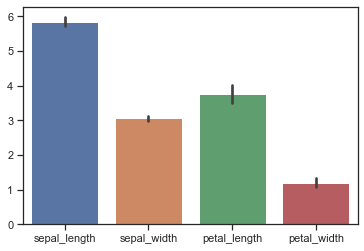

In [63]:
sns.barplot(data=iris)

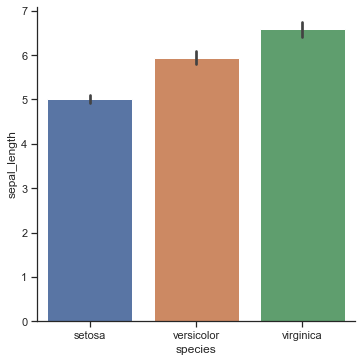

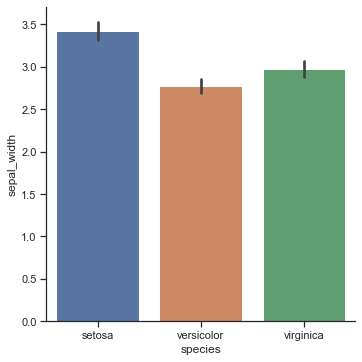

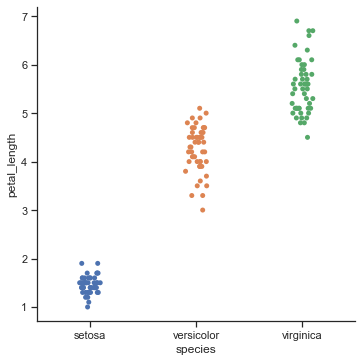

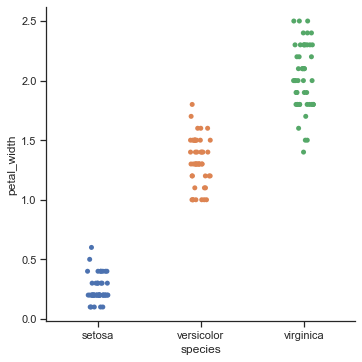

In [86]:
sns.catplot(x="species", y="sepal_length", data=iris, kind="bar")
sns.catplot(x="species", y="sepal_width", data=iris, kind="bar")
sns.catplot(x="species", y="petal_length", data=iris)
sns.catplot(x="species", y="petal_width", data=iris)

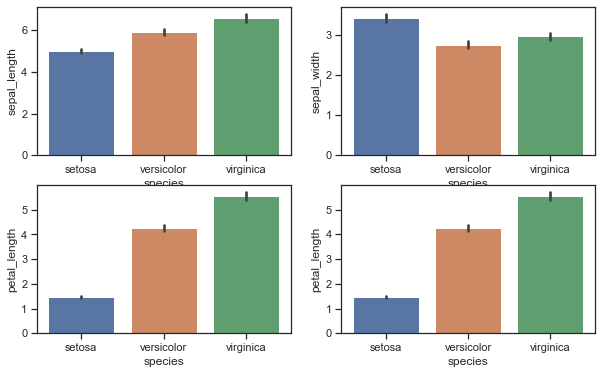

In [65]:
fig = plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:white')

axis1 = fig.add_subplot(2, 2, 1)
axis1 = sns.barplot(x='species', y='sepal_length', data=iris)
axis1.plot()

axis2 = fig.add_subplot(2, 2, 2)
axis2 = sns.barplot(x='species', y='sepal_width', data=iris)
axis2.plot()

axis3 = fig.add_subplot(2, 2, 3)
axis3 = sns.barplot(x='species', y='petal_length', data=iris)
axis3.plot()

axis4 = fig.add_subplot(2, 2, 4)
axis4 = sns.barplot(x='species', y='petal_length', data=iris)
axis4.plot()

plt.show()

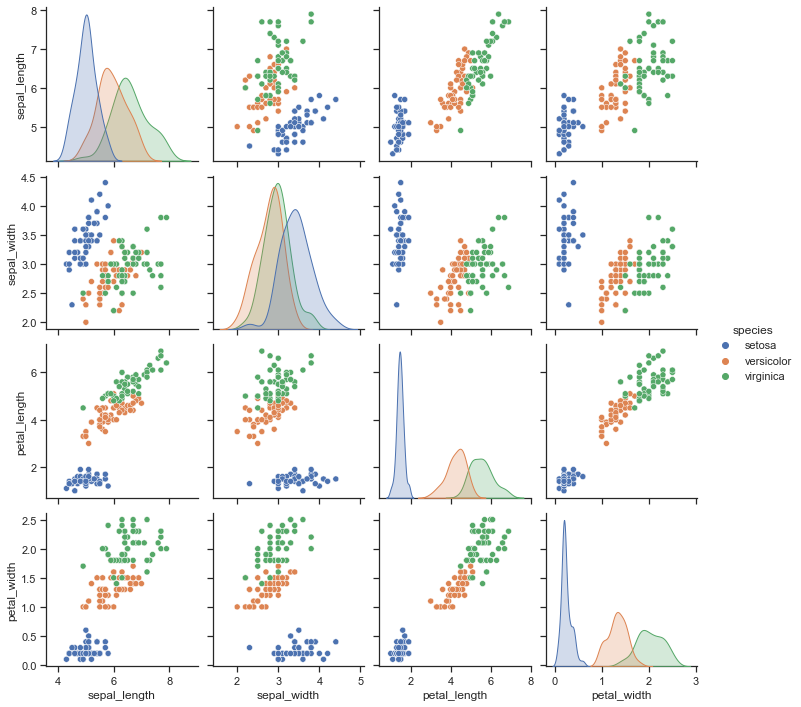

In [67]:
sns.pairplot(iris, hue="species")
plt.show()

In [70]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
